In [2]:
import numpy as np
from matplotlib import pyplot as plt
import xarray
import gsw
import xarray as xr
from ctd2xray import cchdo
%matplotlib inline

In [3]:
ds = xr.open_mfdataset('/home/cjp2164/tutorial/section.nc')
ds

<xarray.Dataset>
Dimensions:           (pressure_i: 600, time: 86)
Coordinates:
  * pressure_i        (pressure_i) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 ...
    longitude         (time) float64 168.1 168.4 168.4 168.5 168.6 169.1 ...
  * time              (time) datetime64[ns] 2011-02-22T21:12:00 ...
    latitude          (time) float64 -70.65 -70.5 -70.47 -70.44 -70.36 -70.1 ...
Data variables:
    woce_time         (time) int32 2112 9 212 513 947 1415 1917 106 645 1926 ...
    rho               (pressure_i, time) float64 1.027e+03 1.028e+03 ...
    temperature_i     (pressure_i, time) float64 -1.363 -1.218 -1.298 -1.342 ...
    oxygen_i          (pressure_i, time) float64 320.2 338.8 340.6 343.0 ...
    salinity_i        (pressure_i, time) float64 34.13 34.17 34.14 34.12 ...
    CT                (pressure_i, time) float64 -1.359 -1.215 -1.294 -1.339 ...
    woce_date         (time) int32 20110222 20110223 20110223 20110223 ...
    pressure_QC_i     (pressure_i, time) float64 2.0

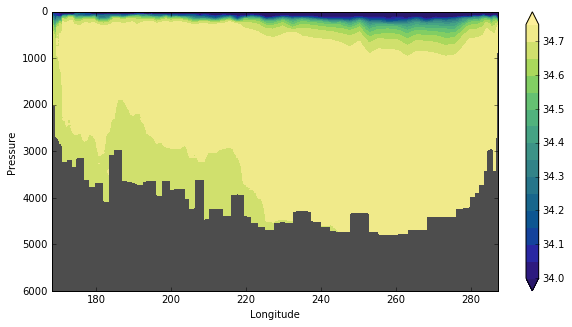

In [143]:
import cmocean

fig, ax = plt.subplots(figsize=(10,5),subplot_kw={'axisbg': '0.3'})

con=ax.contourf(ds.longitude,ds.pressure_i,ds.salinity_i,
                np.arange(34,34.8,0.05), cmap=cmocean.cm.haline,
                extend='both')
ax.invert_yaxis()
fig.colorbar(con)
ax.set_xlabel('Longitude')
ax.set_ylabel('Pressure') 

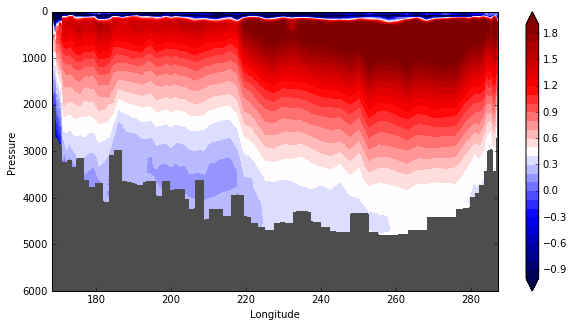

In [142]:
fig, ax = plt.subplots(figsize=(10,5),subplot_kw={'axisbg': '0.3'})

con=ax.contourf(ds.longitude,ds.pressure_i,ds.temperature_i,np.arange(-1,2,0.1),
                cmap='seismic',extend='both')
ax.invert_yaxis()
cb=fig.colorbar(con)
ax.set_xlabel('Longitude')
ax.set_ylabel('Pressure') 

(-2.2, 2.5)

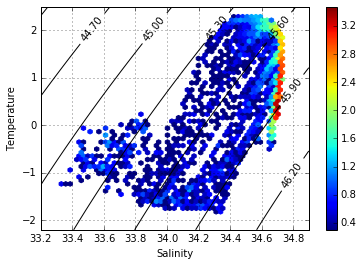

In [164]:
s_comp = ds.salinity_i.to_masked_array().compressed()
t_comp = ds.temperature_i.to_masked_array().compressed()
plt.hexbin(s_comp,
           t_comp,
           bins='log',
           gridsize=50,mincnt=1)
plt.colorbar()
s_grid, t_grid = np.meshgrid(
    np.linspace(33.2,34.9,100),
    np.linspace(-2.2,2.5,100)
)

pref = 4000
dens_grid = gsw.rho(s_grid.ravel(), t_grid.ravel(), pref).reshape(s_grid.shape)-1000

con = plt.contour(s_grid, t_grid, dens_grid, colors='k') 
plt.clabel(con, fmt='%4.2f')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.grid(True)
plt.xlim([33.2,34.9])
plt.ylim([-2.2,2.5])

In [35]:
ds2 = xr.open_mfdataset('/home/cjp2164/tutorial/section2.nc')
ds2

<xarray.Dataset>
Dimensions:           (pressure_i: 600, time: 99)
Coordinates:
  * pressure_i        (pressure_i) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 ...
    longitude         (time) float64 289.9 288.9 288.0 287.7 287.7 287.8 ...
  * time              (time) datetime64[ns] 1992-02-22T20:33:00 ...
    latitude          (time) float64 -67.47 -67.17 -66.89 -66.81 -66.78 ...
Data variables:
    woce_time         (time) int32 2033 2344 1054 1912 2206 247 711 1225 ...
    temperature_i     (pressure_i, time) float64 -0.04955 0.271 -0.1117 ...
    oxygen_i          (pressure_i, time) float64 357.1 360.2 352.5 346.8 ...
    pressure_QC_i     (pressure_i, time) float64 2.0 2.0 2.0 2.0 2.0 2.0 2.0 ...
    woce_date         (time) int32 19920222 19920222 19920223 19920223 ...
    salinity_i        (pressure_i, time) float64 33.31 33.43 33.54 33.55 ...
    cast              (time) |S40 '1' '1' '1' '1' '1' '2' '1' '1' '1' '1' ...
    station           (time) |S40 '682' '683' '684' '685' '68

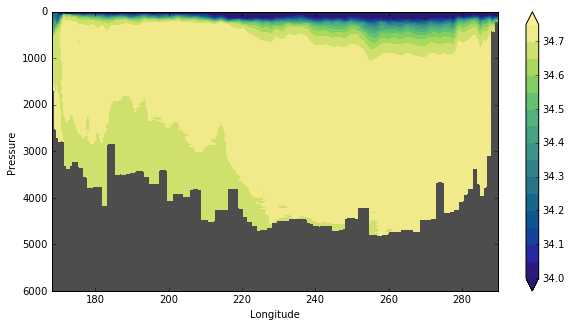

In [144]:
fig, ax = plt.subplots(figsize=(10,5),subplot_kw={'axisbg': '0.3'})

con=ax.contourf(ds2.longitude,ds2.pressure_i,ds2.salinity_i,
                np.arange(34,34.8,0.05), cmap=cmocean.cm.haline,
                extend='both')
ax.invert_yaxis()
fig.colorbar(con)
ax.set_xlabel('Longitude')
ax.set_ylabel('Pressure') 

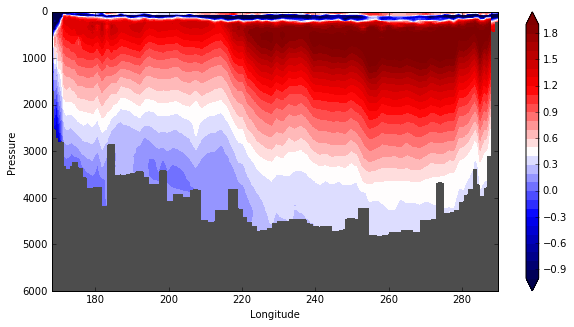

In [162]:
fig, ax = plt.subplots(figsize=(10,5),subplot_kw={'axisbg': '0.3'})

con=ax.contourf(ds2.longitude,ds2.pressure_i,ds2.temperature_i,np.arange(-1,2,0.1),
                cmap='seismic',extend='both')
ax.invert_yaxis()
cb=fig.colorbar(con)
ax.set_xlabel('Longitude')
ax.set_ylabel('Pressure')

(4500, 0)

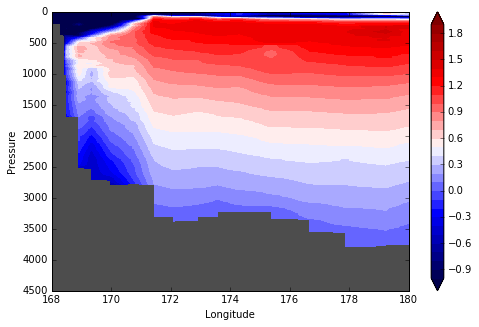

In [146]:
fig, ax = plt.subplots(figsize=(8,5),subplot_kw={'axisbg': '0.3'})

con=ax.contourf(ds2.longitude,ds2.pressure_i,ds2.temperature_i,np.arange(-1,2,0.1),
                cmap='seismic',extend='both')
con.set_clim(-1,2)
ax.invert_yaxis()
fig.colorbar(con)
ax.set_xlabel('Longitude')
ax.set_ylabel('Pressure') 
ax.set_xlim([168,180])
ax.set_ylim([4500,0])

(-2.2, 2.5)

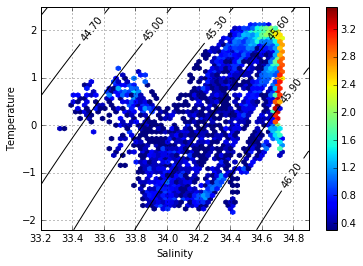

In [124]:
s2_comp = ds2.salinity_i.to_masked_array().compressed()
t2_comp = ds2.temperature_i.to_masked_array().compressed()
plt.hexbin(s2_comp,
           t2_comp,
           bins='log',
           gridsize=50,mincnt=1)
plt.colorbar()

s_grid, t_grid = np.meshgrid(
    np.linspace(33.2,34.9,100),
    np.linspace(-2.2,2.5,100)
)

pref = 4000
dens_grid = gsw.rho(s_grid.ravel(), t_grid.ravel(), pref).reshape(s_grid.shape)-1000

con = plt.contour(s_grid, t_grid, dens_grid, colors='k') 
plt.clabel(con, fmt='%4.2f')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.grid(True)
plt.xlim([33.2,34.9])
plt.ylim([-2.2,2.5])